In [1]:
import sys
import os

# Add the src directory to the Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)
src_dir = os.path.join(parent_dir, 'src')
sys.path.append(src_dir)

import numpy as np
import matplotlib.pyplot as plt
from preprocessing import train_test_split, load_mnist
from perceptron import Perceptron

# Adjust this path to match your folder structure
data_path = os.path.join(parent_dir, 'data', 'mnist')

# Load all training data
X_all, y_all = load_mnist(data_path, kind='train')

# Normalize the data
X_all = X_all.astype(np.float32) / 255

print(f"All data shape: {X_all.shape}")
print(f"All labels shape: {y_all.shape}")

# Split the data into new training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, seed=2108)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Labels path: /Users/nathan/Desktop/Perceptron/data/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte
Images path: /Users/nathan/Desktop/Perceptron/data/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte
All data shape: (60000, 784)
All labels shape: (60000,)
Training data shape: (48000, 784)
Test data shape: (12000, 784)


Epoch 0, Loss: 2.307045094655151
Epoch 10, Loss: 2.2026019974387556
Epoch 20, Loss: 2.106886266431475
Epoch 30, Loss: 2.018529100263842
Epoch 40, Loss: 1.9367059056527396
Epoch 50, Loss: 1.8608423330259498
Epoch 60, Loss: 1.7904774638996932
Epoch 70, Loss: 1.725203960425052
Epoch 80, Loss: 1.6646438099121605
Epoch 90, Loss: 1.608439715442651
Test accuracy on new test set: 0.7655833333333333


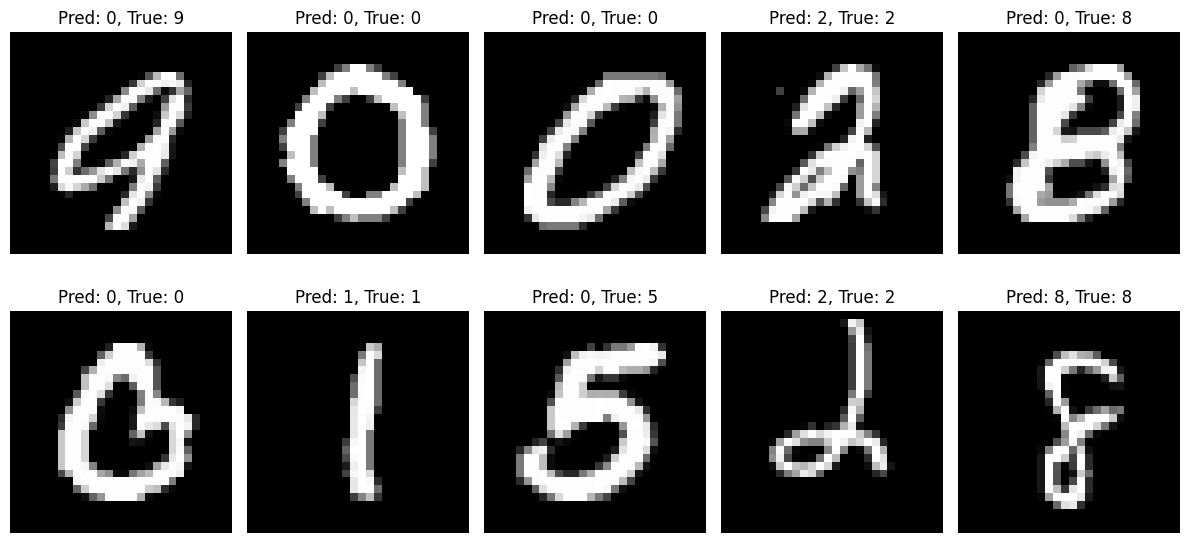

In [2]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, seed=2108)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on new test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy on new test set: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

Epoch 0, Loss: 2.3181902678031556
Epoch 10, Loss: 2.2135095313855433
Epoch 20, Loss: 2.1172028589332323
Epoch 30, Loss: 2.028088676983722
Epoch 40, Loss: 1.945459902791705
Epoch 50, Loss: 1.8688083952892518
Epoch 60, Loss: 1.797706364116418
Epoch 70, Loss: 1.7317600364597716
Epoch 80, Loss: 1.6705942461892034
Epoch 90, Loss: 1.6138491484437216
Test accuracy: 0.7748333333333334


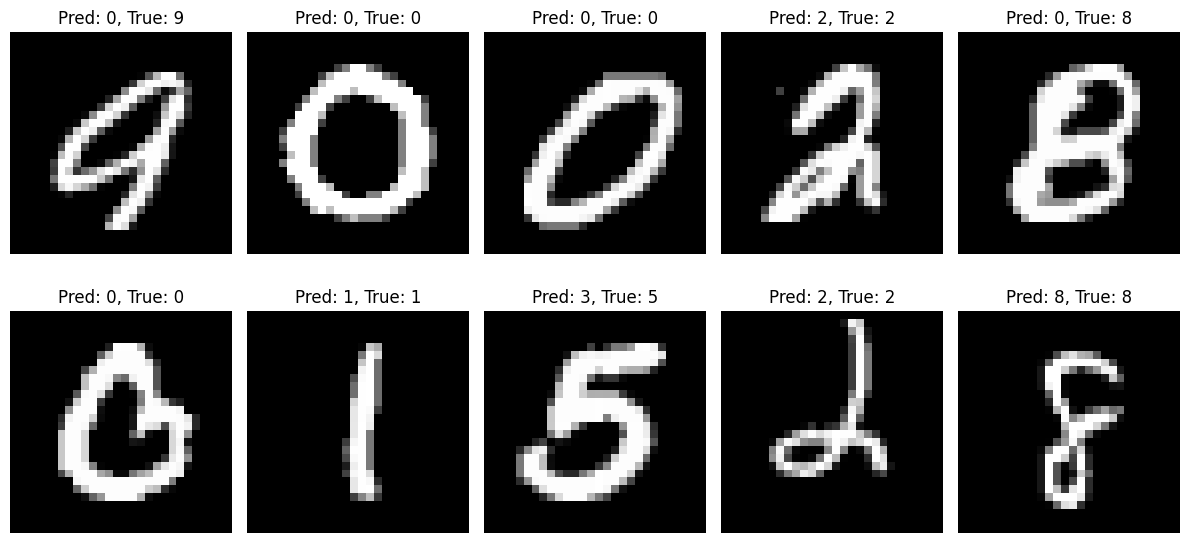

In [3]:
#Experimenting with a larger validation set / smaller training set

# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, seed=2108)

# Initialize and train the perceptron
input_size = 784  # 28x28 pixels
num_classes = 10  # digits 0-9
perceptron = Perceptron(input_size, num_classes)
perceptron.train(X_train, y_train)

# Evaluate on test set
predictions = perceptron.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"Test accuracy: {accuracy}")

# Visualize some predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, True: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()